# Part 2 - 2 Point Stats

 - rigourous way to classify microstructure
 
 - 2 point statistic contain the first order distribution of how states are related
 
Let's start using PyMKS by creating some artificial microsturctures to analyze

In [2]:
import pymks

## Construct Artificial Microstructures

In [3]:
from pymks.datasets import make_microstructure

In [4]:
?make_microstructure

In [5]:
data = make_microstructure(n_samples=1, size=(101, 101), n_phases=2, grain_size=(20, 20))

In [6]:
print(data.shape)

(1, 101, 101)


In [7]:
print(data[0, :10, :10])

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


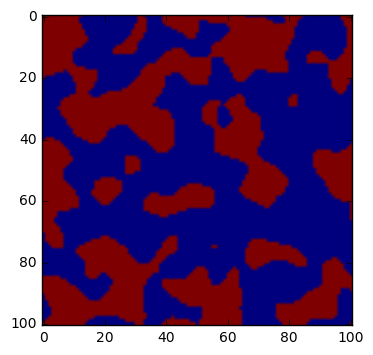

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(data[0])

## Lamellar Microstructure

In [11]:
data_lamellar = make_microstructure(n_samples=2, size=(101, 101), n_phases=2, grain_size=(95, 15))

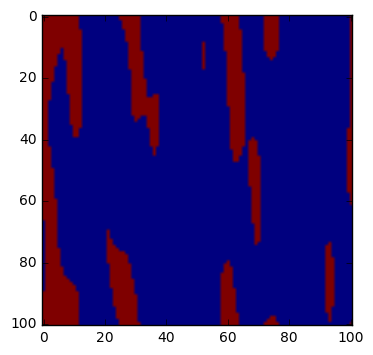

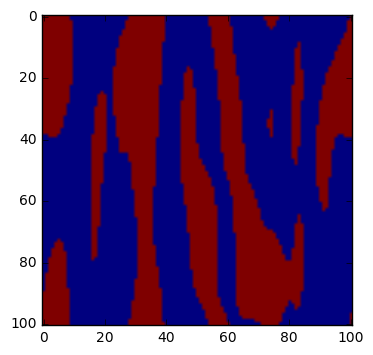

In [12]:
plt.imshow(data_lamellar[0])
plt.show()
plt.imshow(data_lamellar[1])
plt.show()

## Digital Signal -- Discretization

The next step is to deconstruct the microstructure into a digital signal,

 0 -> (1, 0)
 
 1 -> (0, 1)
 

In [13]:
import numpy as np

data = np.random.randint(2, size=(1, 3, 3))
print(data)
print(data.shape)

[[[0 0 0]
  [0 1 0]
  [1 0 0]]]
(1, 3, 3)


In [14]:
from pymks.bases import PrimitiveBasis

In [15]:
?PrimitiveBasis

In [16]:
basis = PrimitiveBasis(n_states=2, domain=[0, 1])
data_disc = basis.discretize(data)

In [17]:
print(data_disc.shape)

(1, 3, 3, 2)


In [18]:
print(data_disc[0, 0, 0])

[ 1.  0.]


## 2 Point Stats



In [53]:
data_blob = make_microstructure(n_samples=50, size=(101, 101), n_phases=2, grain_size=(20, 20))
data_lamellar_v = make_microstructure(n_samples=50, size=(101, 101), n_phases=2, grain_size=(95, 20))
data_lamellar_h = make_microstructure(n_samples=50, size=(101, 101), n_phases=2, grain_size=(20, 95))


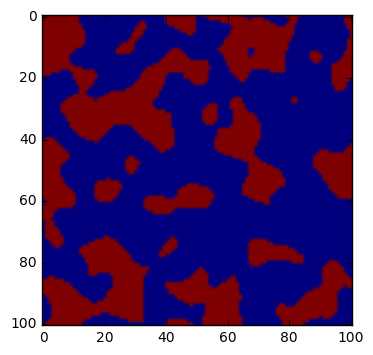

In [54]:
plt.imshow(data_blob[0])

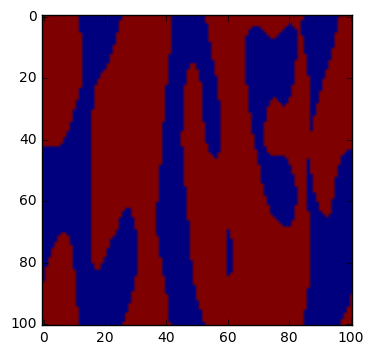

In [55]:
plt.imshow(data_lamellar_v[1])

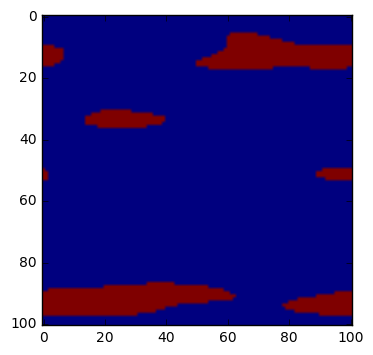

In [57]:
plt.imshow(data_lamellar_h[0])

In [58]:
data_lamellar_v.shape

(50, 101, 101)

In [59]:
data = np.concatenate([data_regular, data_lamellar_v, data_lamellar_h], axis=0)

In [60]:
data.shape

(150, 101, 101)

In [61]:
from pymks.stats import correlate

basis = PrimitiveBasis(n_states=2, domain=[0, 1])
data_corr = correlate(data, basis=basis)

In [62]:
data_corr.shape

(150, 101, 101, 3)

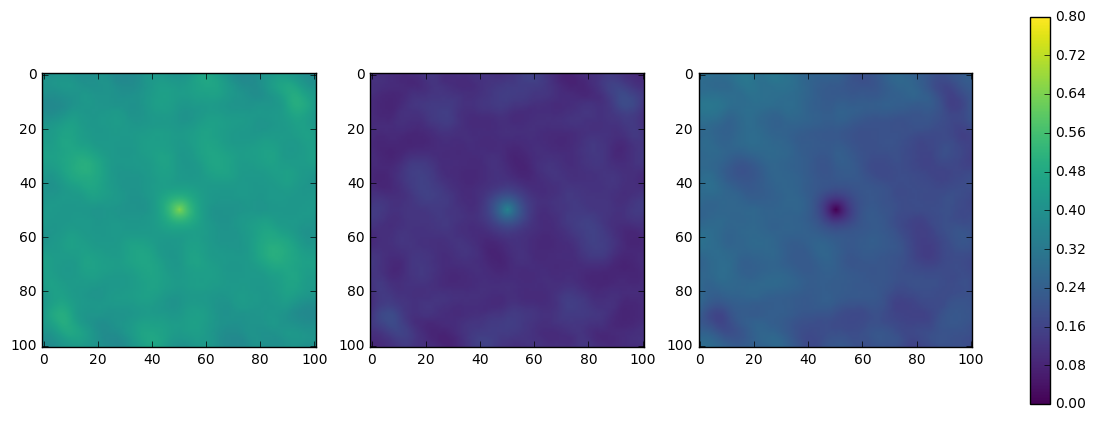

In [63]:
fig, axs = plt.subplots(1, 3)

for i, ax in enumerate(axs):
    im = ax.imshow(data_corr[0, :, :, i], vmin=0.0, vmax=0.8, cmap="viridis")
fig.set_size_inches(15, 5)
fig.colorbar(im, ax=axs.ravel().tolist());

In [64]:
print(data_corr[0, :, :, 0] + data_corr[0, :, :, 1] + data_corr[0, :, :, 2] + data_corr[0, ::-1, ::-1, 2])

[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


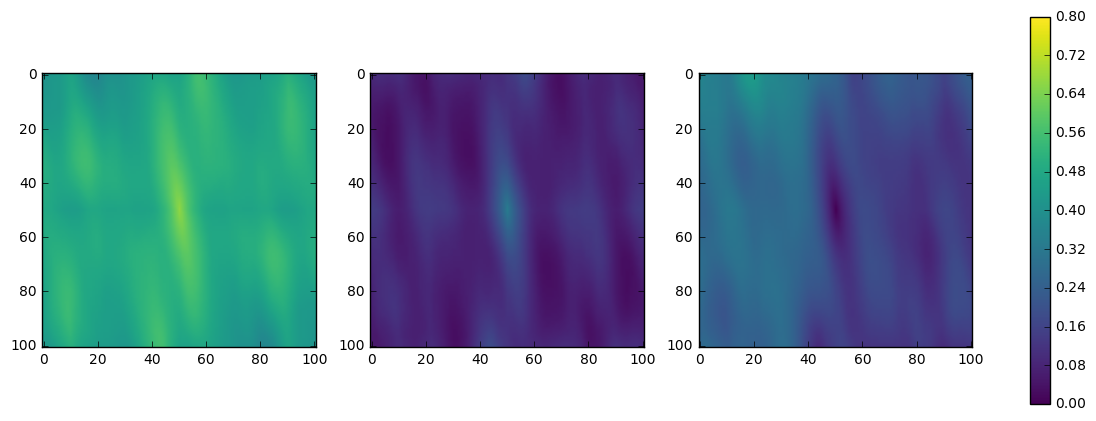

In [67]:
fig, axs = plt.subplots(1, 3)

for i, ax in enumerate(axs):
    im = ax.imshow(data_corr[50, :, :, i], vmin=0.0, vmax=0.8, cmap="viridis")
fig.set_size_inches(15, 5)
fig.colorbar(im, ax=axs.ravel().tolist());

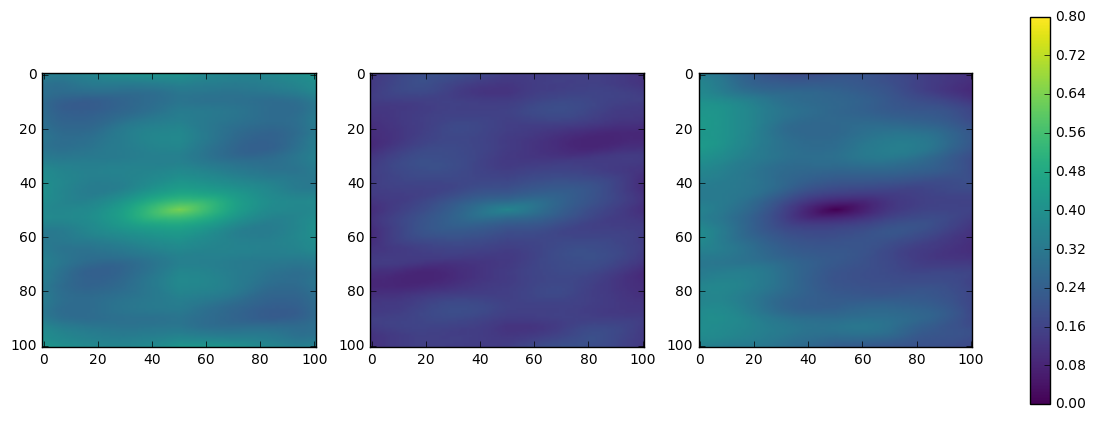

In [68]:
fig, axs = plt.subplots(1, 3)

for i, ax in enumerate(axs):
    im = ax.imshow(data_corr[-1, :, :, i], vmin=0.0, vmax=0.8, cmap="viridis")
fig.set_size_inches(15, 5)
fig.colorbar(im, ax=axs.ravel().tolist());

In [71]:
data_corr.shape

(150, 101, 101, 3)

In [72]:
data_reshape = np.reshape(data_corr, (data_corr.shape[0], data_corr[0].size))

In [75]:
data_reshape.shape

(150, 30603)

In [78]:
data_mean = data_reshape - np.mean(data_reshape, axis=1)[:, None]

In [81]:
print(max(data_reshape.flatten()))
print(min(data_reshape.flatten()))

0.905504370423
-9.92275265824e-17


In [82]:
print(max(data_mean.flatten()))
print(min(data_mean.flatten()))

0.602971954277
-0.302532416145


In [83]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=3)

In [84]:
data_pca = pca_model.fit_transform(data_mean)

In [85]:
data_pca.shape

(150, 3)